In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


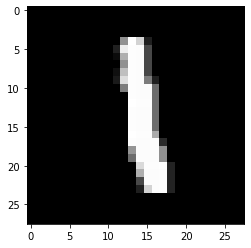

In [3]:
# visualize one image
%matplotlib inline
plt.imshow(x_train[6] , cmap='gray' )

In [4]:
x_train.shape
num_features = x_train.shape[1] * x_train.shape[2]
print('The number of features of each image is:', num_features)

The number of features of each image is: 784


In [5]:
print('The type of 2D input is {0} , so we should convert it to float32'.format(x_train.dtype))
x_train, x_test = x_train.astype('float32') , x_test.astype('float32')

The type of 2D input is uint8 , so we should convert it to float32


In [6]:
# Now we should flatten the input to 1D vector
# -1 means it is an unknown dimension and we want numpy to figure it out
x_train, x_test = x_train.reshape((-1,num_features)), x_test.reshape((-1,num_features))
print('The final shape of input: ',x_train.shape)

The final shape of input:  (60000, 784)


In [7]:
# Now we should normalize the input
x_train /= 255
x_test /= 255

In [8]:
# define hyperparameters
lr = 0.001
epochs = 300
batch_size = 520
nhidden = 512
num_output = 10

# create a dataset to merge x and Y 
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(buffer_size=10000).batch(batch_size=batch_size).prefetch(1)

In [9]:
# set the parameters of ANN
# initialize the weights randomely
random_normal = tf.initializers.random_normal()

weights={
  "in" : tf.Variable(random_normal([num_features, nhidden])),
  "out" : tf.Variable(random_normal([nhidden, num_output]))
}

biases={
    "in" : tf.Variable(np.zeros([nhidden])),
    "out" : tf.Variable(np.zeros([num_output]))
}

In [13]:
def NN_model(inputdata):
  hidden_layer = tf.add(tf.matmul(inputdata, weights["in"]), biases["in"])
  hidden_layer = tf.nn.sigmoid(hidden_layer)

  out_layer = tf.add(tf.matmul(hidden_layer, weights['out']), biases["out"])
  return tf.nn.softmax(out_layer)

In [15]:
def loss_function(y_pred, y_true):
  y_true = tf.one_hot(y_true, depth=num_output)
  y_pred = tf.clip_by_value(y_pred,1e-9,1.)
  return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))
